In [54]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [55]:
# reading data
df = pd.read_csv('./data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
display(df.shape, df.head(1))

(4857377, 8)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [56]:
# see most current data
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [57]:
# convert unix timestamp to datetime
df['Datetime'] = df['Timestamp'].apply(datetime.utcfromtimestamp)
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363,2021-03-31 00:00:00


In [58]:
# check for null values 
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
Datetime                   0
dtype: int64

<AxesSubplot:xlabel='Datetime'>

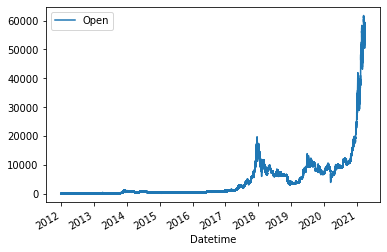

In [59]:
df[['Datetime', 'Open']].set_index('Datetime').plot()

In [60]:
# check each year for null values
df['Year'] = df['Datetime'].dt.year
for y in df['Year'].unique():
    print(y, df[df['Year'] == y]['Open'].isnull().sum())

2011 964
2012 500411
2013 205839
2014 127424
2015 146393
2016 174941
2017 42268
2018 19827
2019 17260
2020 8145
2021 136


※ by looking at scarsity of null values. just getting rid of null values using dropna...

In [61]:
filtered = df.dropna(axis=0, subset=['Open'])
display(filtered.shape, filtered.head(1))

(3613769, 10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011


In [62]:
ldf = filtered[filtered['Year'] < 2021].copy()
display(ldf.shape, ldf.head(1))

(3485744, 10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011


In [63]:
pdf = filtered[filtered['Year'] == 2021].copy()
display(pdf.shape, pdf.head(1))

(128025, 10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year
4729216,1609459200,28999.63,29022.01,28999.14,29006.31,0.86158,24990.483661,29005.427056,2021-01-01,2021


In [64]:
# sort data by timestamp
ldf.sort_values('Timestamp', inplace=True)
pdf.sort_values('Timestamp', inplace=True)

In [65]:
# split keys for normalization
ldf_keys = ldf[['Datetime', 'Timestamp', 'Year']]
ldf = ldf.drop(['Datetime', 'Timestamp', 'Year'], axis=1)

display(ldf_keys.head(1), ldf.head(1), pdf_keys.head(1), pdf.head(1))

,Datetime,Timestamp,Year
0,2011-12-31 07:52:00,1325317920,2011


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


,Datetime,Timestamp,Year
4729216,2021-01-01,1609459200,2021


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4729216,28999.63,29022.01,28999.14,29006.31,0.86158,24990.483661,29005.427056


In [67]:
# normalize data
scaler = MinMaxScaler()
ldf = scaler.fit_transform(ldf)
display(ldf.shape, ldf[1])

(3485744, 7)

array([2.01391719e-05, 2.01391307e-05, 9.87510892e-05, 9.86400641e-05,
       8.19972877e-03, 2.01723383e-05, 2.01487413e-05])

In [68]:
X_train = []
Y_train = []

In [70]:
# make 'open' values as target values
for i in range(60, ldf.shape[0]):
    X_train.append(ldf[i-60: i])
    Y_train.append(ldf[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
display(X_train.shape, Y_train.shape)

(3485684, 60, 7)

(3485684,)

In [4]:
# train using rnn
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# initialize rnn
model = Sequential()
model.add(LSTM(
    units=50,
    activation='relu',
    return_sequences=True,
    input_shape=(X_train.shape[1], 5)))

model.add(Dropout(0.2))
model.add(LSTM(
    unites=60, 
    activation='relu',
    return_sequences=True))

model.add(Dropout(0.3))
model.add(LSTM(
    unites=80, 
    activation='relu',
    return_sequences=True))

model.add(Dropout(0.4))
model.add(LSTM(
    unites=120, 
    activation='relu',
    return_sequences=True))

model.add(Dropout(0.5))
model.add(Dense(units=1))

model.summary()

In [ ]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# learning model
history = model.fit(X_train,
                    Y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Prepare data for prediction
last_60_mins = pd.concat([ldf_keys.tail(60), ldf.tail(60)], axis=1) # get last 60 minutes of training data
pdf = last_60_mins(pdf, ignore_index=True)

# split keys for normalization
pdf_keys = pdf[['Datetime', 'Timestamp', 'Year']]
pdf = pdf.drop(['Datetime', 'Timestamp', 'Year'], axis=1)

display(pdf_keys.shape, pdf.shape)

In [ ]:
pdf = scaler.transform(pdf)
pdf

In [ ]:
X_test = []
Y_test = []

In [ ]:
for i in range(60, pdf.shape[0]):
    X_test.append(pdf[i - 60: i])
    Y_test.append(pdf[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
display(X_test.shape, Y_test.shape)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
# get scaler value
scale = scaler.scale_

In [ ]:
# change it back to actual values
Y_test = Y_test * scale
Y_pred = Y_pred * scale

In [ ]:
pd.DataFrame([Y_test, Y_pred])

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()